**Load libraries**

In [1]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

**Base Functions**

In [2]:
###################################################################################################################
# Function: convolve2d
# Description: It allows us to apply convolution process to an image
# This function which takes an image and a kernel
# and returns the convolution of them
# Args:
#   image: a numpy array of size [image_height, image_width].
#   kernel: a numpy array of size [kernel_height, kernel_width].
# Returns:
#   a numpy array of size [image_height, image_width] (convolution output).
###################################################################################################################
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel
    output = np.zeros_like(image)  # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):  # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y:y + 3, x:x + 3]).sum()
    return output


Load image to be tranformed by convolution

In [3]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['cat.jpg']))
print("Height=", im.height, "Width=", im.width)

Saving cat.jpg to cat.jpg
Height= 647 Width= 970


**Basic operations (overview)**

Convert to gray scale by averaging the pixel values of three channels

In [9]:
imgarr = np.array(im)
imgarr.shape
print(imgarr.shape)
imgarr = color.rgb2gray(imgarr) 
imgarr.shape







(647, 970, 3)


(647, 970)

**Visualize**

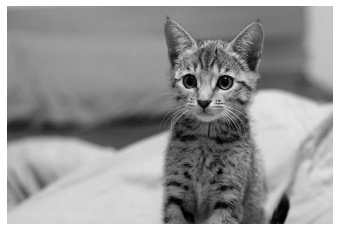

In [8]:
# Visualize the image
plt.imshow(imgarr, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Padding Effect

(647, 970)
(747, 1070)


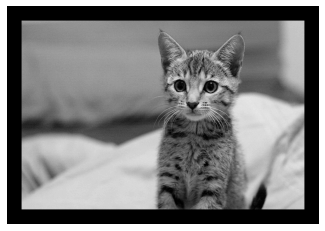

In [10]:
#Image padding introduces new pixels around the edges of an image
PADDING=100
X=PADDING//2
Y=PADDING//2
image_padded = np.zeros((imgarr.shape[0] + PADDING, imgarr.shape[1] + PADDING))
image_padded[X:-X, Y:-Y] = imgarr #(Get position x,y to add the original image)
print(imgarr.shape)
print(image_padded.shape)

plt.imshow(image_padded, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


Custom Kernels

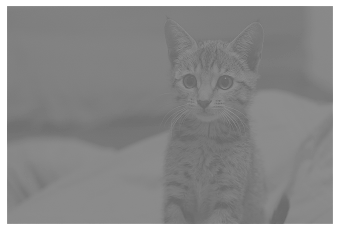

In [11]:
#Kernels (Filter)

kernel = np.array([[0,-1,-0],
                   [-1,5,-1],
                   [0,-1,-0]])
img_convolved=convolve2d(imgarr,kernel)
plt.imshow(img_convolved, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Standard kernels included

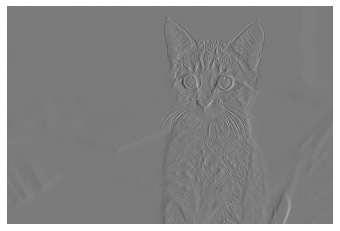

In [12]:
from scipy import ndimage, misc

result = ndimage.sobel(imgarr)
plt.imshow(result, cmap=plt.cm.gray)
plt.axis('off')
plt.show()




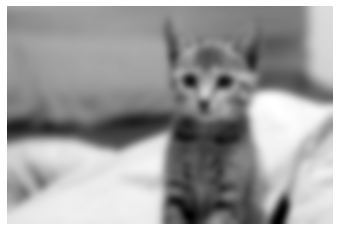

In [13]:
result = ndimage.gaussian_filter(imgarr, sigma=10)
plt.imshow(result, cmap=plt.cm.gray)
plt.axis('off')
plt.show()



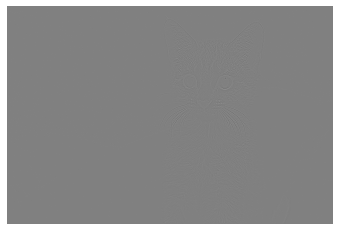

In [14]:
result = ndimage.laplace(imgarr)
plt.imshow(result, cmap=plt.cm.gray)
plt.axis('off')
plt.show()



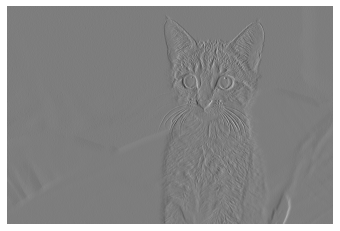

In [15]:
result = ndimage.prewitt(imgarr)
plt.imshow(result, cmap=plt.cm.gray)
plt.axis('off')
plt.show()